In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from stateinterpreter import Classifier, identify_metastable_states, load_dataframe, descriptors_from_traj
from stateinterpreter.plot import plot_states
#Paranoia
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')

Helper functions to define groups.

In [10]:
import re
def get_residue(s):
    m = re.search(r'\w{3}\d+$', s)
    return m.group() if m else None

def _get_angle_groups(angle_names):
    groups = []
    for s in angle_names:
        groups.append(get_residue(s))
    return np.array(groups)

In [2]:
kBT = 2.5
BPTI_data_path = '../../../data/md_datasets/BPTI-unbiased/'
colvar_file = BPTI_data_path + 'COLVAR'
traj_dict = {
        'trajectory' : BPTI_data_path+'all_trj_10ns.trr',
        'topology' : BPTI_data_path+'bpti-protein.pdb'
    }
#Load Descriptors
#desc_path = '../../../data/md_datasets/BPTI-unbiased/descritpors.pkl'
#descriptors = pd.read_pickle(desc_path)
colvar = load_dataframe(colvar_file).drop(['idx', 'time'], axis=1)

In [3]:
descriptors, _feats_info = descriptors_from_traj(traj_dict, descriptors=['dihedrals'])

Descriptors: (103125, 105)


In [10]:
cv_list = ['tica1', 'tica2']
kBT = 2.5
states_labels = identify_metastable_states(colvar, cv_list, kBT, bw_method=0.2, fes_cutoff=kBT)

DEV >>> Finding Local Minima
DEV >>> Basin Assignment
Found 5 local minima with selected populations:
	Basin 0 -> 25685 configurations.
	Basin 1 -> 69759 configurations.
	Basin 2 -> 1207 configurations.
	Basin 3 -> 389 configurations.
	Basin 4 -> 798 configurations.


(<Figure size 480x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Metastable states identification'}, xlabel='tica1', ylabel='tica2'>)

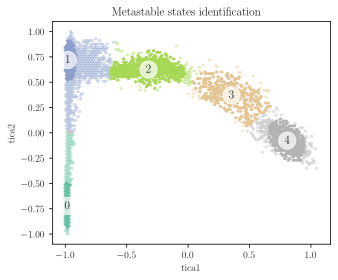

In [11]:
plot_states(colvar, states_labels, cv_list, fes_isolines = False)

In [13]:
regularizers = np.geomspace(0.01, 1, 25)
select_feat = 'sin_|cos_'
sample, features_names, classes_names = data.sample(400, regex_filter = select_feat)
groups = _get_angle_groups(features_names)
classifier = Classifier(sample, features_names, classes_names)
classifier.compute(regularizers, max_iter= 10000, groups=groups)

Group Lasso: 100%|██████████| 25/25 [02:20<00:00,  5.61s/it]


Number of groups vs. regularization strength $\lambda$

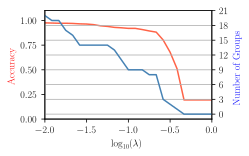

In [14]:
classifier.plot_groups();

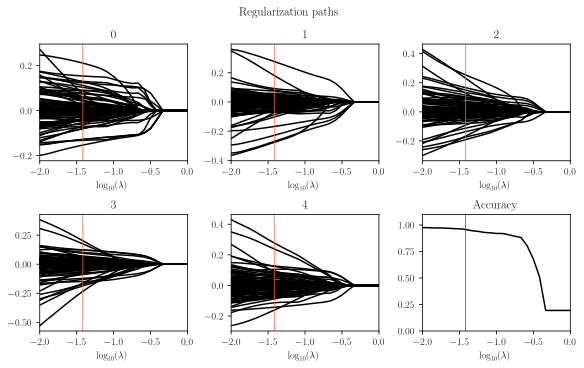

In [16]:
reg = 10**(-1.4)
classifier.print_selected(reg)
classifier.plot(reg);

In [18]:
classifier.prune(reg)
classifier.compute(regularizers, max_iter = 10000)

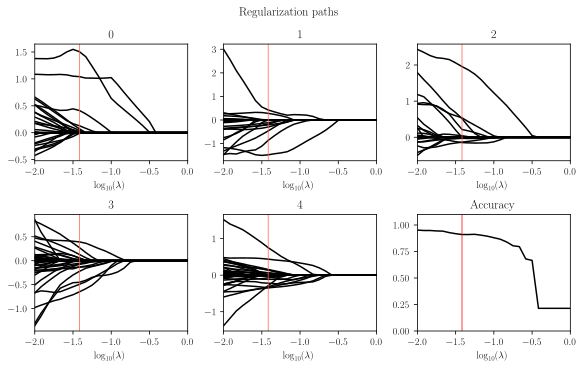

In [19]:
classifier.plot(reg);

In [20]:
classifier.prune(reg)
classifier.compute(regularizers, max_iter = 10000, quadratic_kernel=True)

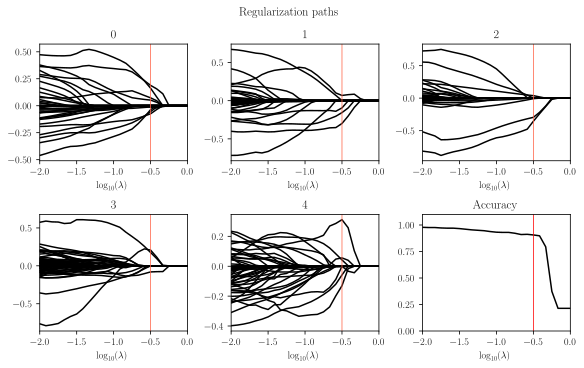

In [22]:
reg = 10**(-0.5)
classifier.plot(reg);